<a href="https://colab.research.google.com/github/MemerGamer/IntelligensModszerekTantargy/blob/main/LinearisRegresszio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import math
import numpy as np
# %matplotlib inline ### ugy tunik, most nem kell, de maskor jol johet :-)

from random import random
from collections.abc import Iterable
from typing import Tuple

**1. feladat: social media elemzés**

A következő feladatban azt vizsgáljuk, milyen összefüggés van egy blogbejegyzésre érkezett kommentek száma és a bejegyzés megjelenése óta eltelt idő között. Ehhez

y_pred = w * x

alakban írható modellt fogunk használni.


(a) Google Colab-ban "!"-lel kezdve kiadhatunk parancssori (linux) parancsokat. Próbálja ki az alábbi cellában található "pwd" (present working directory) parnacsot, majd listázza ki az akutális könyvtár tartalmát, hajtsa végre az adatokat letöltő parancsot és újra listázza ki az aktuális könyvtár tartalmát, ezáltal ellenőrizze, hogy a letöltés sikeres.  

In [2]:
!pwd

/content


In [5]:
!ls

BlogFeedback.zip  sample_data


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip

--2025-03-14 15:07:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/00304/BlogFeedback.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘BlogFeedback.zip’

BlogFeedback.zip        [ <=>                ]   2.46M  15.4MB/s    in 0.2s    

2025-03-14 15:07:59 (15.4 MB/s) - ‘BlogFeedback.zip’ saved [2583605]



In [4]:
!ls

BlogFeedback.zip  sample_data


(b) Az előző részfeladatban az adatokat egy tömörített zip-fájlként tölöttük le. Az operációs rendszer "unzip" parancsát használva tömörítse ki az adatokat!

In [6]:
!unzip BlogFeedback.zip

Archive:  BlogFeedback.zip
  inflating: blogData_test-2012.02.01.00_00.csv  
  inflating: blogData_test-2012.02.02.00_00.csv  
  inflating: blogData_test-2012.02.03.00_00.csv  
  inflating: blogData_test-2012.02.04.00_00.csv  
  inflating: blogData_test-2012.02.05.00_00.csv  
  inflating: blogData_test-2012.02.06.00_00.csv  
  inflating: blogData_test-2012.02.07.00_00.csv  
  inflating: blogData_test-2012.02.08.00_00.csv  
  inflating: blogData_test-2012.02.09.00_00.csv  
  inflating: blogData_test-2012.02.10.00_00.csv  
  inflating: blogData_test-2012.02.11.00_00.csv  
  inflating: blogData_test-2012.02.12.00_00.csv  
  inflating: blogData_test-2012.02.13.00_00.csv  
  inflating: blogData_test-2012.02.14.00_00.csv  
  inflating: blogData_test-2012.02.15.00_00.csv  
  inflating: blogData_test-2012.02.16.00_00.csv  
  inflating: blogData_test-2012.02.17.00_00.csv  
  inflating: blogData_test-2012.02.18.00_00.csv  
  inflating: blogData_test-2012.02.19.00_00.csv  
  inflating: blogData_t

In [7]:
!ls

blogData_test-2012.02.01.00_00.csv  blogData_test-2012.03.04.00_00.csv
blogData_test-2012.02.02.00_00.csv  blogData_test-2012.03.05.00_00.csv
blogData_test-2012.02.03.00_00.csv  blogData_test-2012.03.06.00_00.csv
blogData_test-2012.02.04.00_00.csv  blogData_test-2012.03.07.00_00.csv
blogData_test-2012.02.05.00_00.csv  blogData_test-2012.03.08.00_00.csv
blogData_test-2012.02.06.00_00.csv  blogData_test-2012.03.09.00_00.csv
blogData_test-2012.02.07.00_00.csv  blogData_test-2012.03.10.00_00.csv
blogData_test-2012.02.08.00_00.csv  blogData_test-2012.03.11.00_00.csv
blogData_test-2012.02.09.00_00.csv  blogData_test-2012.03.12.00_00.csv
blogData_test-2012.02.10.00_00.csv  blogData_test-2012.03.13.00_00.csv
blogData_test-2012.02.11.00_00.csv  blogData_test-2012.03.14.00_00.csv
blogData_test-2012.02.12.00_00.csv  blogData_test-2012.03.15.00_00.csv
blogData_test-2012.02.13.00_00.csv  blogData_test-2012.03.16.00_00.csv
blogData_test-2012.02.14.00_00.csv  blogData_test-2012.03.17.00_00.csv
blogDa

(c) A keletkezett fájlok közöl a blogData_train.csv-t fogjuk használni. Az operációs rendszer "head" parancsát használva jelenítse meg a fájl első néhány sorát!

In [8]:
!head blogData_train.csv

40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.4799345,46.18691,-356.0,377.0,0.0,1.0761671,1.795416,0.0,11.0,0.0,0.4004914,1.0780969,0.0,9.0,0.0,0.37755936,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932023,1.521174,-8.0,9.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

(d) Az előző részfeladat eredményét megvizsgálva paraméterezze az adatokat pandas DataFrame-be betöltő parancsot! Ha szükséges, tanulmányozza a Pandas DataFrame read_csv metódusának dokumentációját!

In [9]:
separator =  ','
header = None
blog_data = pd.read_csv('blogData_train.csv', header=header, sep=separator)

In [10]:
blog_data.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


(e) A DataFrame head() metódusát használva jelenítse meg a betöltött adatokat és hasonlítsa össze a kapott adatokat a (c) feladat ereményével és ez alapján ítélje meg, hogy megfelelően sikerült-e az adatok betöltése.

In [11]:
blog_data.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


(f) A DataFrame describe metódusát felhasználva jelenítse meg az egyes attribútumokra vonatkozó leíró statisztikákat!

In [12]:
blog_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


(g) Az adatok leírásának (https://archive.ics.uci.edu/ml/datasets/BlogFeedback) alapos tanulmányozása alapján arra jutottunk, hogy a DataFrame 60-as indexű oszlopa tartalmazza a blogbejegyzés (post) publikálása óta eltelt időt (órában), az 50-es indexű oszlop pedig a kommentek számát. A következőkben csak ezzel a két oszloppal fogunk dolgozni. Feleltesse meg "xs"-t (xs = "x többes száma") a 60-as indexű oszlop, ys pedig az 50-es indexű oszlop!

In [35]:
# a bejegyzés (post) publikálása óta eltelt idő (órában)
xs = blog_data[60]
# kommentek száma (a post publikálása óta)
ys = blog_data[50]

In [36]:
xs.head()

,60
0,10.0
1,35.0
2,35.0
3,10.0
4,34.0


In [37]:
ys.head()

,50
0,2.0
1,6.0
2,6.0
3,2.0
4,3.0


(h) Az ügyféllel való konzultáció eredményeként az elemzés során a "népszerű" blogokkal foglalkozunk, azaz azokkal, amelyek egyes bejegyzéseire érkezett kommentek számának mediánja nagyobb 500-nál. Az adott blog egyes bejegyzéseire érkezett kommentjeinek számának mediánját a DataFrame 4-es indexű oszlopa tartalmazza. Válassza ki az elemzés szempontjából releváns példányokat!

In [41]:
popular_blogs = (blog_data[4] > 500)
# azon blogok, amelyekre "tipikusan" sok komment érkezik (a kommentek számának mediánja nagyobb 500-nál)

xs = xs[popular_blogs]
ys = ys[popular_blogs]

(i) Ábrázoljuk xs-t és ys-t egy scatter plotban annak érdekében, hogy egy benyomásunk legyen arról, hogy a két változó hogyan függ egymástól!

Text(0, 0.5, 'y')

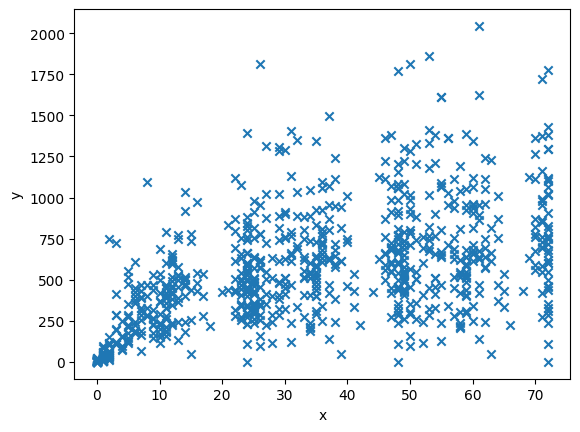

In [43]:
plt.scatter(xs, ys, marker = 'x');
plt.xlabel('x')
plt.ylabel('y')

(j) Egészítse ki az alábbi függvényt, amely kiszámolja egy w paraméterű modell által adott x esetén prediktált értéket!

In [21]:
def pred(w: float, x: float) -> float:
  """
  Az y_pred = w*x alaku modell által prediktált érték kiszámítása

  Bemenet:
  -------
    w : float
      a modell paramétere
    x : float
      azon x érték, amelyhez tartozó predikciót ki akarjuk számolni

  Kimenet:
  --------
    float : a prediktált érték
  """

  return w*x

In [22]:
# test
assert pred(2,3)==6
print("OK")

OK


(k) Egészítse ki az alábbi függvényt, amely kiszámolja egy prediktált y_pred és a hozzá tartozó tényleges y_true érték közötti négyzetes hibát!

In [44]:
def error_for_an_instance(y_pred: float, y_true: float) -> float:
  """
  A négyzetes hiba értéke egy adott példány esetében.

  Bemenet:
  --------
    y_pred : float
      A célváltozó modell által prediktált értéke egy adott példány esetében
    y_true : float
      A célváltozó tényleges értéke ugyanazon példány esetében

  Kimenet:
  --------
    float : a modell hibája az adott példányra
  """

  return (y_true - y_pred)**2

In [45]:
# test
assert error_for_an_instance(3, 5) == 4
assert error_for_an_instance(9, 4) == 25
print("OK")

OK


(l) Egészítse ki az alábbi függvényt, amely az előző pontban készített függvényt felhasználva kiszámolja egy adathalmazra adott predikciók és a hozzájuk tartozó tényleges célváltozó-értékek közötti RMSE-t!

In [48]:
def rmse(ys_pred: Iterable, ys_true: Iterable) -> float:
  """
  A model hibája (RMSE) egy adathalmazra

  Bemenet:
  --------
    ys_pred : Iterable
      A célváltozó modell által prediktált értéke az adathalmaz minden
      egyes példányára
    ys_true : Iterable
      A célváltozó tényleges értéke az adathalmaz minden egyes példányára
      (ugyanabban a sorrendben, mint ys_pred)

  Kimenet:
  --------
  float : a modell hibája
  """

  '''
    [error_for_an_instance(y_pred, y_true) for y_pred, y_true in zip(ys_pred, ys_true)]
  '''

  return math.sqrt(np.mean([error_for_an_instance(y_pred, y_true) for y_pred, y_true in zip(ys_pred, ys_true)]))

In [49]:
# test
assert rmse( [13, 76] , [8, 81] ) == 5
print("OK")

OK


(m) A modell paraméterét meghatározó algoritmus, az előadáson tanultaknak megfelelően, a négyzetes hibák átlagát fogja minimalizálni. A négyzetes hibák átlaga valójában egy összeg, melynek minden egyes tagja az adathalmaz egy-egy példányának felel meg. Ezért beszélhetünk a példányonkénti hibáról és a példányonkénti hiba w szerinti deriváltjáról, amelynek értéke

2 * (y_pred - y_true) * x

ahol

- *y_pred* a modell által az adott példány esetében prediktált célváltozóértéjet,

- *y_true* a célváltozó tényleges értékét,

- *x* pedig a bemeneti változó értékét jelöli.

Írjon egy függvényt, amely kiszámolja a hiba deriváltját egy példányra.

In [59]:
def derivative_of_the_error_for_an_instance(w: float,
                                            x: float, y_true: float) -> float:
  """
  A hiba deriváltja egy példány esetében

  Bemenet:
  --------
    w : float
      a modell w paramétere
    x : float
      az adott példány, amely esetében a hiba deriváltját számoljuk
    y_true : float
      a célváltozó értéke az x példány esetében

  Kimenet:
  --------
    float : a hiba w szerinti deriváltja az adott példányra
  """

  y_pred = pred(w,x)
  return 2 * (y_pred - y_true) * x

In [60]:
# test
assert derivative_of_the_error_for_an_instance(2, 4, 10) == -16
print("OK")

OK


(n) Az előző pontban írt függvényt felhasználva egészítse ki az alábbi függvényt, amely egy adathalmazra vonatkozó átlagos négyzetes hiba deriváltját, azaz a példányonkénti négyzetes hibák deriváltjának átlagát, számolja!

In [62]:
def derivative_of_the_error(w: float, xs: Iterable, ys: Iterable) -> float:
  """
  Az hiba deriváltja egy adathalmazra

  Bemenet:
  --------
    w : float
      a modell w paramétere
    xs : Iterable
      egyváltozós adathalmaz, amely esetében a hiba deriváltját számoljuk
    ys_true : float
      a célváltozó értéke az x egyes példányaira

  Kimenet:
  --------
    float : a hiba w szerinti deriváltja
  """

  return np.mean([derivative_of_the_error_for_an_instance(w, x, y) for x, y in zip(xs, ys)])

In [63]:
#test
assert derivative_of_the_error( 2, [3,4,6], [6, 10, 12]) == -16/3
print("OK")

OK


(o) Fejezze be az alábbi függvényt úgy, hogy gradiens ereszkedés (gradient descent) módszert használva meghatározza a modell *w* paraméterét!

In [56]:
def train(xs: Iterable, ys: Iterable,
          num_epochs: int = 100, eps: float = 1e-5) -> float :
  """
  Az y_pred = w*x alaku modell paraméterének (w) meghatározása a tanítóadatok
  alapján

  Bemenet:
  --------
    xs : Iterable
      tanítópéldányok
    ys : Iterable
      Az xs példányokhoz tartozó címkék
    num_epochs : int
      Tanító epochok száma
    eps : float
      Tanulási ráta

  Kimenet
  -------
    float : w paraméter értéke
  """

  w = 0  # initialize w
  for epoch in range(num_epochs):
    derivative = derivative_of_the_error(w, xs, ys)
    w = w - eps * derivative
  return w

(p) Fejlessze tovább az előbbi függvényt olyan módon, hogy minden iteráció végén számolja ki a modell RMSE-jét a *w* aktuális értéke mellett a tanítóadatokon és minden 10-dik iteráció után írja ki
az iteráció számát, az aktuális w-t és az RMSE-t!

In [58]:
def train(xs: Iterable, ys: Iterable,
          num_epochs: int = 100, eps: float = 1e-5) -> float:
  """
  Az y_pred = w*x alaku modell paraméterének (w) meghatározása a tanítóadatok
  alapján

  Bemenet:
  --------
    xs : Iterable
      tanítópéldányok
    ys : Iterable
      Az xs példányokhoz tartozó címkék
    num_epochs : int
      Tanító epochok száma
    eps : float
      Tanulási ráta

  Kimenet
  -------
    float : w paraméter értéke
  """

  w = 0  # initialize w
  for epoch in range(num_epochs):
    derivative = derivative_of_the_error(w, xs, ys)
    w = w - eps * derivative

    # Calculate RMSE at the end of each epoch
    ys_pred = [pred(w, x) for x in xs]
    error = rmse(ys_pred, ys)

    # Print every 10th epoch
    if (epoch+1) % 10 == 0:
      print(f"Epoch {epoch+1}, w = {w:.4f}, RMSE = {error:.4f}")

  return w

(q) Módosítsa ez előbbi függvényt olyan módon, hogy az RMSE és w értékét minden iteráció végén egy-egy listába mentse és végül ezeket a listákat is visszaadja a függvény!

In [61]:
def train(xs: Iterable, ys: Iterable,
          num_epochs: int = 100, eps: float = 1e-5) -> Tuple[float, list, list]:
  """
  Az y_pred = w*x alaku modell paraméterének (w) meghatározása a tanítóadatok
  alapján

  Bemenet:
  --------
    xs : Iterable
      tanítópéldányok
    ys : Iterable
      Az xs példányokhoz tartozó címkék
    num_epochs : int
      Tanító epochok száma
    eps : float
      Tanulási ráta

  Kimenet
  -------
    float : w paraméter értéke
    list : w paraméter értéke az egyes iterációk végén
    list : RMSE az egyes iterációk végén
  """

  w = 0  # initialize w
  all_w = []
  all_err = []

  for epoch in range(num_epochs):
    derivative = derivative_of_the_error(w, xs, ys)
    w = w - eps * derivative

    # Calculate RMSE at the end of each epoch
    ys_pred = [pred(w, x) for x in xs]
    error = rmse(ys_pred, ys)

    # Save w and error
    all_w.append(w)
    all_err.append(error)

    # Print every 10th epoch
    if (epoch+1) % 10 == 0:
      print(f"Epoch {epoch+1}, w = {w:.4f}, RMSE = {error:.4f}")

  return w, all_w, all_err

A következőkben elvégezzük a tanítást (azaz a *w* paraméter meghatározását), és megjelenítjük az RMSE-t és w-t az iterációszám függvényében.

In [64]:
w_best, all_w, all_err = train(xs,ys, num_epochs=500)

Epoch 10, w = 3.9959, RMSE = 525.3594
Epoch 20, w = 6.8557, RMSE = 441.3825
Epoch 30, w = 8.9026, RMSE = 391.4503
Epoch 40, w = 10.3675, RMSE = 363.2245
Epoch 50, w = 11.4159, RMSE = 347.8804
Epoch 60, w = 12.1663, RMSE = 339.7524
Epoch 70, w = 12.7033, RMSE = 335.5127
Epoch 80, w = 13.0877, RMSE = 333.3201
Epoch 90, w = 13.3628, RMSE = 332.1913
Epoch 100, w = 13.5597, RMSE = 331.6117
Epoch 110, w = 13.7006, RMSE = 331.3143
Epoch 120, w = 13.8015, RMSE = 331.1619
Epoch 130, w = 13.8736, RMSE = 331.0839
Epoch 140, w = 13.9253, RMSE = 331.0439
Epoch 150, w = 13.9623, RMSE = 331.0234
Epoch 160, w = 13.9887, RMSE = 331.0129
Epoch 170, w = 14.0077, RMSE = 331.0075
Epoch 180, w = 14.0212, RMSE = 331.0047
Epoch 190, w = 14.0309, RMSE = 331.0033
Epoch 200, w = 14.0379, RMSE = 331.0026
Epoch 210, w = 14.0428, RMSE = 331.0022
Epoch 220, w = 14.0464, RMSE = 331.0020
Epoch 230, w = 14.0489, RMSE = 331.0019
Epoch 240, w = 14.0508, RMSE = 331.0019
Epoch 250, w = 14.0521, RMSE = 331.0019
Epoch 260, w

In [65]:
train_history = pd.DataFrame({'w':all_w, 'err':all_err})

<Axes: >

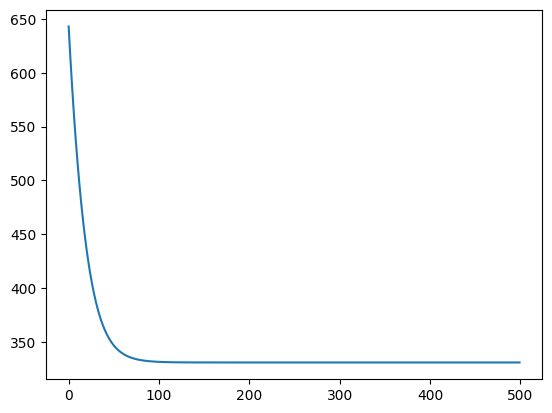

In [66]:
train_history['err'].plot()

<Axes: >

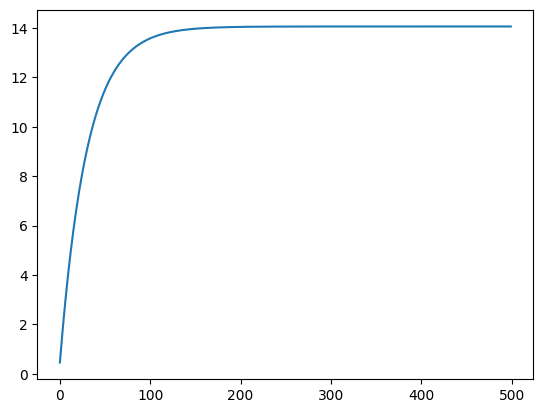

In [67]:
train_history['w'].plot()

Modell és adatok megjelenítése közös diagramon.

In [68]:
ys_pred = [pred(w_best,x) for x in xs]

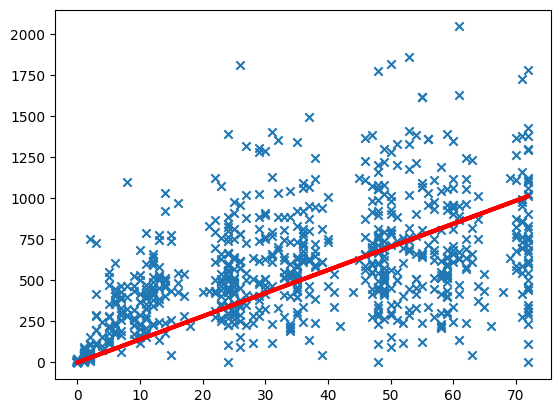

In [69]:
plt.scatter(xs, ys, marker = 'x');
plt.plot(xs, ys_pred, color='red', linewidth=3)

(r) Írassa ki és értelmezze *w* tanítás során megtalált értékét!

In [70]:
print(f"The best value of w is: {w_best:.4f}")
print(f"This means that for each hour that passes, a popular blog post receives approximately {w_best:.4f} additional comments.")

The best value of w is: 14.0554
This means that for each hour that passes, a popular blog post receives approximately 14.0554 additional comments.


**2. feladat: COVID esetszámok előrejelzése többváltozós lineáris regresszióval**

(a) Nyissa meg egy böngészőben a http://www.biointelligence.hu/mi/covid_data.txt URL-en elérhető fájlt, amely kb. másfél hónap COVID-esetszámait tartalmazza Romániára vonatkozóan. A fájl szemrevételezése alapján paraméterezze a fájlt pandas DataFrame-be betöltő parancsot!

In [ ]:
header = ...IDE JÖN A KÓD...
separator = ...IDE JÖN A KÓD...
data = pd.read_csv('http://www.biointelligence.hu/mi/covid_data.txt',
                   header=header, sep=separator)

(b) A DataFrame head() metódusát használva jelenítse meg a betöltött adatokat és ellenőrizze, hogy megfelelően sikerült-e az adatok betöltése!

In [ ]:
...IDE JÖN A KÓD...

(c) Hajtsa végre az alábbi kódot az adatok megjelenítéséhez. Mit látunk az ábrán? Módosítsa a kódot olyan módon, hogy a vízszintes (x) tengely mentén ne hetente, hanem kéthetente legyenek az osztáspontok, a diagram alatti terület zöld színnel legyen kitöltve, valamint a függőleges tengely felirata "Esetszám" legyen!

In [ ]:
ax = data['cases'].plot(figsize=(15,5), grid=True, x_compat=True)
ax.set_xticks( list(range(0,50,7)) )
ax.set_xticklabels( [ data['date'][0], data['date'][7], data['date'][14],
                      data['date'][21], data['date'][28], data['date'][35],
                      data['date'][42], data['date'][49] ] )
ax.set_xlabel("Dátum")
plt.fill_between(data['date'], data['cases'], facecolor='b', alpha=0.3)

Az adatok tanulmányozása alapján azt látjuk, hogy az esetszám heti periodicitást mutat. Ebből arra következtetünk, hogy akármilyen előrejelző modellt is használunk, legalább egyheti bemeneti adatra van szükségünk ahhoz, hogy értelmes előrejelzést végezhessünk. Annak érdekében, hogy a modell a trendet (növekvő vagy csökkenő) is képes legyen megtanulni, úgy döntünk, hogy összesen kétheti adatot fogunk bemeneti adatként használni. A modell bemenete tehát egy 14 hosszúságú *x = (x0, x1, ..., x13)* vektor lesz, amely az előző napok esetszámait fogja tartalmazni, pontosabban: x13 = aktuális napi esetszám, x12 = aktuális napot egyel megelőző napi esetszám, x11 = aktuális napot 2-vel megelőző napi esetszám, stb. Az *y* célváltozó értéke a kövekező napi esetszám. A múltbeli adatokra ismerjük a célváltozó értékét. A múltbeli adatokból a következő módon hozunk létre tanítóadatokat:

- első tanítópéldány: jan. 20-tól febr. 2-ig tartó esetszámok (az adatbázisban szereplő első 14 nap esetszáma), a célváltozó értéke ennél a példánynál: febr. 3-i esetszám,

- második tanítópéldány: jan. 21-től febr. 3-ig tartó esetszámok, a célváltozó értéke ennél a példánynál: febr. 4-i esetszám,

- és így tovább.


In [ ]:
NUM_FEATURES = 14
NUM_INSTANCES = len(data) - NUM_FEATURES

(d) Írjon egy függvényt, amely 14 egymást követő nap esetszámát visszaadja egy np.array-ben! A függvény bemenete, hogy a DataFrame-ben szereplő hányadik nap esetszáma legyen az első érték a visszaadott np.array-ben.

In [ ]:
def get_instance(i: int) -> np.array:
  """
  14 egymást követő nap esetszáma

  Bemenet:
  --------
    i : int
      Kezdőnap

  Kimenet:
  --------
    np.array:
      az i-dik napi és azt követő 13 napi esetszám
  """

  return ...IDE JÖN A KÓD...

(e) Írjon egy függvényt, amely előállítja a tanítóadatként szolgáló adattáblát! (Az adattábla egy-egy sora egy-egy tanítópéldányt tartalmazzon!)

In [ ]:
def get_xs() -> np.array:
  """
  Kimenet:
  --------
    np.array: a tanítóadatokat tartalmazó adattábla
  """

  ...IDE JÖN A KÓD...

In [ ]:
xs = get_xs()

(f) Írjon egy függvényt, amely a célváltozó egyes példányokhoz tartozó értékeit állítja elő!

In [ ]:
def get_ys() -> np.array:
  """
  Kimenet
  -------
    np.array : a célváltozó egyes példányokhoz tartozó értékei
  """
  ...IDE JÖN A KÓD...

In [ ]:
ys = get_ys()

In [ ]:
# self check
assert len(ys) == len(xs)
assert len(xs) == NUM_INSTANCES

(g) Írja meg a többváltozós lineáris regressziós modell predikcióját számító függvényt!

In [ ]:
def pred(w: np.array, x: np.array) -> float:
  """
  Az y_pred = w_0*x_0 + w_1*x_1 + ... + w_n*x_n alaku modell által prediktált érték
  kiszámítása

  Bemenet:
  -------
    w : np.array
      a modell paraméterei w_0, w_1, ..., w_n
    x : np.array
      azon x példány, x = (x_0, x_1, ..., x_n), amelyhez tartozó predikciót ki
      akarjuk számolni

  Kimenet:
  --------
    float : a prediktált érték
  """

  ...IDE JÖN A KÓD...

In [ ]:
# test
assert pred(np.array([0.5, 1, 0.5, 2]), np.array([1, 3, 4, 5])) == 15.5

(h) Írja meg a hiba parciális deriváltjait egy adott példányra kiszámító függvényt!

Segítség:  

d_i = 2 * (y_pred - y_true) * x_i

ahol d_i = i-dik parciális derivált, x_i = az x példány i-dik változójának értéke.

In [ ]:
def derivative_of_the_error_for_an_instance(w: np.array, x: np.array,
                                            y_true: float) -> np.array:
  """
  A hiba deriváltja egy példány esetében

  Bemenet:
  --------
    w : np.array
      a modell paraméterei w_0, w_1, ..., w_n
    x : np.array
      azon x példány, x = (x_0, x_1, ..., x_n), amely esetében a hiba deriváltját
      számoljuk
    y_true : float
      a célváltozó értéke az x példány esetében

  Kimenet:
  --------
    np.array : a hiba w_0, w_1, ... w_n szerinti parciális deriváltjainak értéke
      az adott példányra
  """

  ...IDE JÖN A KÓD...

In [ ]:
#test

from numpy.testing import assert_array_equal

model_params = np.array([0.5, 1, 0.5, 2])
instance = np.array([1, 3, 4, 5])
true_label = 10.5

derivatives_expected = np.array([10, 30, 40, 50])

derivatives_received = derivative_of_the_error_for_an_instance(
    model_params, instance, true_label)

assert_array_equal(derivatives_received, derivatives_expected)

(i) A hiba deriváltja a teljes adatbázisra a példányonkénti parciális  deriváltak értékeinek átlaga, azaz pl. w_0 szerinti parciális derivált értéke a tejles adatbázisra egyenlő a w_0 szerinti példányonkénti parciális deriváltak értékeinek átlagával. Írja meg a parciális deriváltakat a teljes adatbázisra számoló függvényt!

In [ ]:
def derivative_of_the_error(w: np.array, xs: np.array,
                            ys: np.array) -> np.array:
  """
  A hiba deriváltja egy adattábla példányaira

  Bemenet:
  --------
    w : np.array
      a modell paraméterei w_0, w_1, ..., w_n
    xs : np.array
      az adattábla, amelynek példányaira vonatkozóan a hiba deriváltját
      számoljuk
    ys : np.array
      a célváltozó értéke az xs példányai esetében

  Kimenet:
  --------
    np.array : a hiba w_0, w_1, ... w_n szerinti parciális deriváltjainak értéke
      az xs adattábla példányaira nézve
  """

  ...IDE JÖN A KÓD...

In [ ]:
#test
model_params = np.array([0.5, 1, 0.5, 2])
instances = np.array([[1, 3, 4, 5], [2, 6, 8, 10]])
true_labels = np.array([10.5, 31])

derivatives_expected = np.array([5, 15, 20, 25])

derivatives_received = derivative_of_the_error(
    model_params, instances, true_labels)

assert_array_equal(derivatives_received, derivatives_expected)

(j) Az 1. feladatbelihez hasonlóan írja meg a modell tanítását (azaz a paraméterek értékeinek meghatározását) végző függvényt!

In [ ]:
def train(xs: np.array, ys: np.array,
          num_epochs: int = 100, eps: float = 1e-5) -> Tuple[float, list, list]:
  """
  Az y_pred = w*x alaku modell paraméterének (w) meghatározása a tanítóadatok
  alapján

  Bemenet:
  --------
    xs : Iterable
      tanítópéldányok
    ys : Iterable
      Az xs példányokhoz tartozó címkék
    num_epochs : int
      Tanító epochok száma
    eps : float
      Tanulási ráta

  Kimenet
  -------
    float : w paraméter értéke
    list : w paraméter értéke az egyes iterációk végén
    list : RMSE az egyes iterációk végén
  """

  ...IDE JÖN A KÓD...

(k) A tanítófüggvény többszöri meghívása és a hiba iterációszám függvényében történő ábrázolását felhasználva, határozza meg a tanítási paraméterek, az epochok száma (num_epochs) és a tanulási ráta (eps) megfelelő értékeit!

In [ ]:
...IDE JÖN A KÓD...

(l) Az adatbázisban szereplő utolsó érték a márc. 13-i esetszám. "Jelezzük" előre az esetszámot márc. 14-re!

In [ ]:
...IDE JÖN A KÓD...

**Diszkusszió**

Hogyan végeznénk előrejelzést több napra?

**Lineáris Regresszió standard függvénykönyvtárakban**

A lineáris regresszió implementáció természetesen megtalálható standard függvénykönyvtárakban, pl. scikit-learn-ben is. Tanulmányozzuk a

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

címen található példát!